# Sausage boundary exploration

In this notebook I will look at results from a runs I did varying the transition widths of the skin region.
The smoothed core skin profile is made of four regions, a core region of constant j, a transition region, a skin region of constant j, and a transition region to zero j. The total flux tube radius is always 1. In these scans the skin region width was held fixed at 0.001, and the transition width was varied from 0.0001 to 0.1. 

I will see if there are any trends in the sausage boundary at $\bar{k}$=0, or the slope at $\bar{k}=0.4$ for given thicknesses of transition region and skin width.

I will determine the boundary by liner interpolation between the last negative energy and last postitive enery point. 
To determine the slope I will interpolate two points for two different $\bar{k}$ around 0.4 and then caclulate the slope between them.

In [1]:
from __future__ import print_function, unicode_literals, division
from __future__ import absolute_import
from future import standard_library, utils
from future.builtins import (ascii, bytes, chr, dict, filter, hex, input,
                             int, map, next, oct, open, pow, range, round,
                             str, super, zip)

In [36]:
import numpy as np
import sys
sys.path.append('..')
sys.path.append('../../../provenance_scripts/')
import call_provenance as cp
reload(cp)
import skin_core_scanner_simple as scss
reload(scss)
import equil_solver as es
reload(es)
import newcomb_simple as new

reload(new)

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
sns.set_context('poster')

import lambda_k_plotting_simple as plot
reload(plot)

from scipy.interpolate import interp1d, splev
from scipy.optimize import brentq


<module 'lambda_k_plotting_simple' from '../lambda_k_plotting_simple.pyc'>

In [3]:
import sqlite3
connection = sqlite3.connect('../../output/output.db')
cursor = connection.cursor()

In [4]:
def select_datetime(cursor, statement, parameters=None):
    statement_start = "SELECT datetime FROM Runs WHERE " 
    if parameters is not None:
        cursor.execute(statement_start + statement, parameters)
    else:
        cursor.execute(statement_start + statement)
    results = cursor.fetchall()
    results = [item for tup in results for item in tup]
    return results

# Linear scan of skin reion width 0.03 to 0.8 with $\epsilon = 0.1$

In [50]:
dates = select_datetime(cursor, 'git_commit=? AND epsilon=? AND datetime<=? AND datetime>?',
                        parameters=['27c75fa46f4fcb761d3f3d30313ac6345fa51084', 0.1, '2016-01-02-05-26',
                                    '2016-01-02-00-24'])

In [51]:
len(dates)

25

In [52]:
dates

[u'2016-01-02-00-33',
 u'2016-01-02-00-47',
 u'2016-01-02-01-02',
 u'2016-01-02-01-15',
 u'2016-01-02-01-27',
 u'2016-01-02-01-40',
 u'2016-01-02-01-52',
 u'2016-01-02-02-04',
 u'2016-01-02-02-16',
 u'2016-01-02-02-28',
 u'2016-01-02-02-40',
 u'2016-01-02-02-51',
 u'2016-01-02-03-03',
 u'2016-01-02-03-15',
 u'2016-01-02-03-26',
 u'2016-01-02-03-38',
 u'2016-01-02-03-49',
 u'2016-01-02-04-01',
 u'2016-01-02-04-12',
 u'2016-01-02-04-24',
 u'2016-01-02-04-35',
 u'2016-01-02-04-46',
 u'2016-01-02-04-58',
 u'2016-01-02-05-09',
 u'2016-01-02-05-20']

In [53]:
transition_widths = np.linspace(0.01, 0.4, 50)
skin_widths = np.ones(50) * 0.01

core_radii = []
for i in xrange(skin_widths.size):
    (skin_width, transition_width) = skin_widths[i], transition_widths[i]
    core_radii.append(1.- 2.*transition_width - skin_width)
core_radii = np.asarray(core_radii)    

core_radii = core_radii[::2]

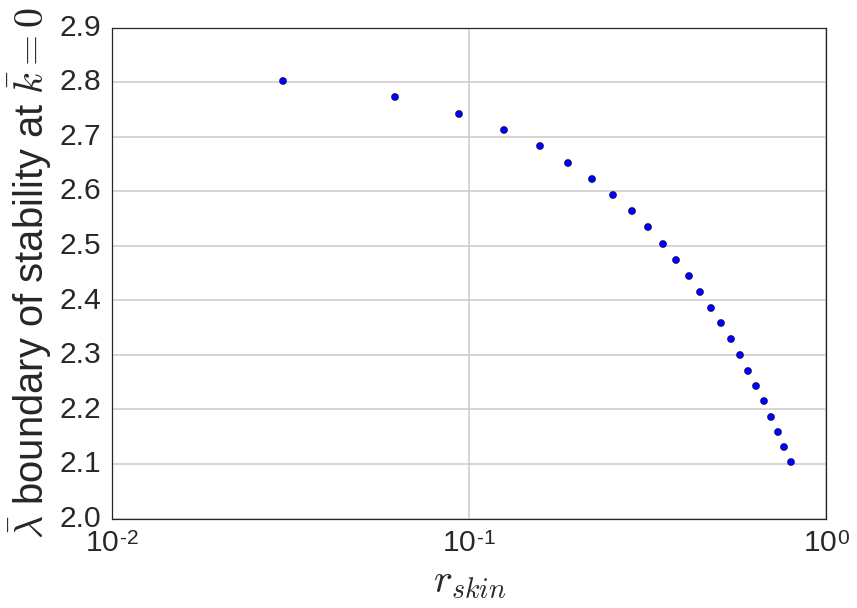

In [54]:
date_filenames = []
for date in dates:
    date_filenames.append("../../output/" + date + "/meshes.npz")    
lambda_boundary = []
for filename in date_filenames:
    results = np.load(filename)
    external_sausage_norm = results['d_w_norm_m_0']
    lambda_a_mesh = results['lambda_a_mesh']
    k_a_mesh = results['k_a_mesh']
    lambda_func = interp1d(lambda_a_mesh[0], external_sausage_norm[0], kind='cubic', bounds_error=False)
    lambda_boundary.append(brentq(lambda_func, 0.1, 3.0))  
plt.scatter(1-core_radii, lambda_boundary, s=50)
plt.xscale("log", nonposx='clip')
plt.grid('on')
plt.ylabel(r'$\bar{\lambda}$ boundary of stability at $\bar{k} = 0$', size=40)
plt.xlabel(r'$r_{skin}$', size=40)
axes=plt.gca()
plt.setp(axes.get_xticklabels(), fontsize=30)
plt.setp(axes.get_yticklabels(), fontsize=30)
plt.show()

# Linear scan of skin region width 0.03 to 0.8 with $\epsilon = 0.5$

In [14]:
dates = select_datetime(cursor, 'git_commit=? AND epsilon=? AND datetime<=? AND datetime>?',
                        parameters=['27c75fa46f4fcb761d3f3d30313ac6345fa51084', 0.5, '2016-01-02-05-26',
                                    '2016-01-02-00-24'])

In [17]:
dates

[u'2016-01-02-00-40',
 u'2016-01-02-00-54',
 u'2016-01-02-01-08',
 u'2016-01-02-01-21',
 u'2016-01-02-01-34',
 u'2016-01-02-01-46',
 u'2016-01-02-01-58',
 u'2016-01-02-02-10',
 u'2016-01-02-02-22',
 u'2016-01-02-02-34',
 u'2016-01-02-02-45',
 u'2016-01-02-02-57',
 u'2016-01-02-03-09',
 u'2016-01-02-03-20',
 u'2016-01-02-03-32',
 u'2016-01-02-03-44',
 u'2016-01-02-03-55',
 u'2016-01-02-04-07',
 u'2016-01-02-04-18',
 u'2016-01-02-04-29',
 u'2016-01-02-04-41',
 u'2016-01-02-04-52',
 u'2016-01-02-05-03',
 u'2016-01-02-05-14',
 u'2016-01-02-05-26']

In [15]:
transition_widths = np.linspace(0.01, 0.4, 50)
skin_widths = np.ones(50) * 0.01

core_radii = []
for i in xrange(skin_widths.size):
    (skin_width, transition_width) = skin_widths[i], transition_widths[i]
    core_radii.append(1.- 2.*transition_width - skin_width)
core_radii = np.asarray(core_radii)    

core_radii = core_radii[::2]

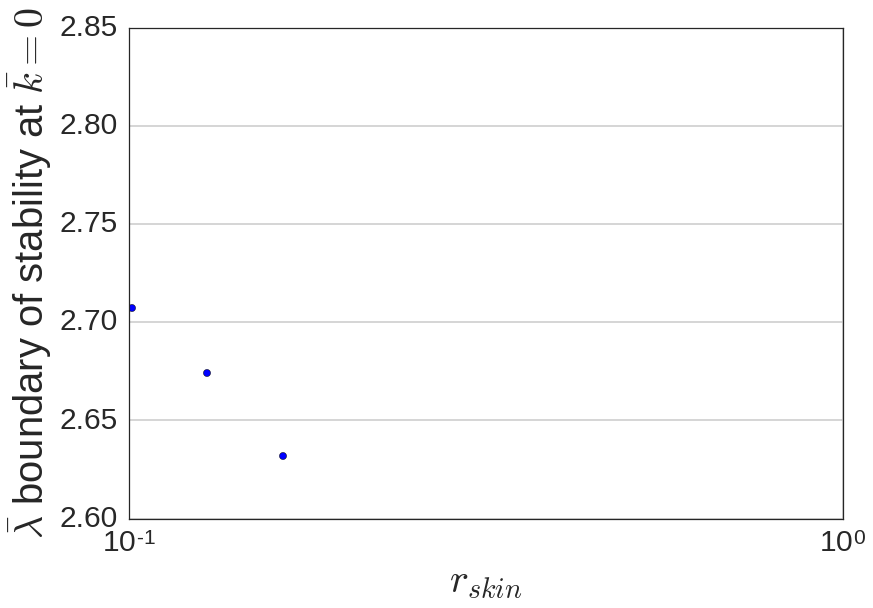

In [28]:
date_filenames = []
for date in dates:
    date_filenames.append("../../output/" + date + "/meshes.npz")    
lambda_boundary = []
for filename in date_filenames[:19]:
    results = np.load(filename)
    external_sausage_norm = results['d_w_norm_m_0']
    lambda_a_mesh = results['lambda_a_mesh']
    k_a_mesh = results['k_a_mesh']
    lambda_func = interp1d(lambda_a_mesh[0], external_sausage_norm[0], kind='cubic', bounds_error=False)
    lambda_boundary.append(brentq(lambda_func, 0.1, 3.0))  
plt.scatter(1-core_radii[:19], lambda_boundary, s=50)
plt.xscale("log", nonposx='clip')
plt.grid('on')
plt.ylabel(r'$\bar{\lambda}$ boundary of stability at $\bar{k} = 0$', size=40)
plt.xlabel(r'$r_{skin}$', size=40)plot.plot_dW_given_delta('../../output/2016-01-02-00-33/meshes.npz', 
                            0.1, 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            label_pos=[(1.0, 1.), (2.5, 0.4)],
                            floor_norm=True, analytic_compare=False, with_interface=True)
axes=plt.gca()
plt.setp(axes.get_xticklabels(), fontsize=30)
plt.setp(axes.get_yticklabels(), fontsize=30)
plt.show()

# Linear scan of skin region width 0.003 to 0.8 with $\epsilon = 0.1$

In [58]:
dates = select_datetime(cursor, 'git_commit=? AND epsilon=? AND datetime<=? AND datetime>?',
                        parameters=['27c75fa46f4fcb761d3f3d30313ac6345fa51084', 0.1, '2016-01-02-00-24',
                                    '2016-01-01-17-14'])

In [59]:
len(dates)

25

In [60]:
dates

[u'2016-01-01-18-15',
 u'2016-01-01-18-33',
 u'2016-01-01-18-51',
 u'2016-01-01-19-09',
 u'2016-01-01-19-26',
 u'2016-01-01-19-45',
 u'2016-01-01-20-03',
 u'2016-01-01-20-20',
 u'2016-01-01-20-38',
 u'2016-01-01-20-55',
 u'2016-01-01-21-12',
 u'2016-01-01-21-28',
 u'2016-01-01-21-43',
 u'2016-01-01-21-58',
 u'2016-01-01-22-13',
 u'2016-01-01-22-28',
 u'2016-01-01-22-42',
 u'2016-01-01-22-55',
 u'2016-01-01-23-08',
 u'2016-01-01-23-20',
 u'2016-01-01-23-32',
 u'2016-01-01-23-44',
 u'2016-01-01-23-56',
 u'2016-01-02-00-07',
 u'2016-01-02-00-19']

In [61]:
transition_widths = np.logspace(np.log10(0.001), np.log10(0.4), 50)
skin_widths = np.ones(50) * 0.001

core_radii = []
for i in xrange(skin_widths.size):
    (skin_width, transition_width) = skin_widths[i], transition_widths[i]
    core_radii.append(1.- 2.*transition_width - skin_width)
core_radii = np.asarray(core_radii)    

core_radii = core_radii[::2]

In [67]:
core_radii

array([ 0.997     ,  0.99644591,  0.99573831,  0.99483467,  0.99368068,
        0.99220698,  0.99032501,  0.98792163,  0.98485242,  0.98093289,
        0.97592747,  0.96953531,  0.96137224,  0.95094762,  0.9376349 ,
        0.92063395,  0.89892295,  0.87119701,  0.83578971,  0.79057296,
        0.73282908,  0.6590875 ,  0.56491612,  0.44465493,  0.29107586])

In [68]:
lambda_boundary

[2.826125470197264,
 2.825607836949749,
 2.8249276644796173,
 2.8240618893848897,
 2.8229678093994206,
 2.8215650768128118,
 2.819782526223663,
 2.817510785993345,
 2.814624271104471,
 2.8109042717400814,
 2.8061691435979883,
 2.800127308441032,
 2.7924026436684497,
 2.7825567468574026,
 2.769997106278365,
 2.753957314357627,
 2.7334852272100796,
 2.7073886999830497,
 2.6740831369132745,
 2.631697278734849,
 2.5776961012254325,
 2.5090751994773433,
 2.42208919382368,
 2.312404028893209,
 2.1757042302743614]

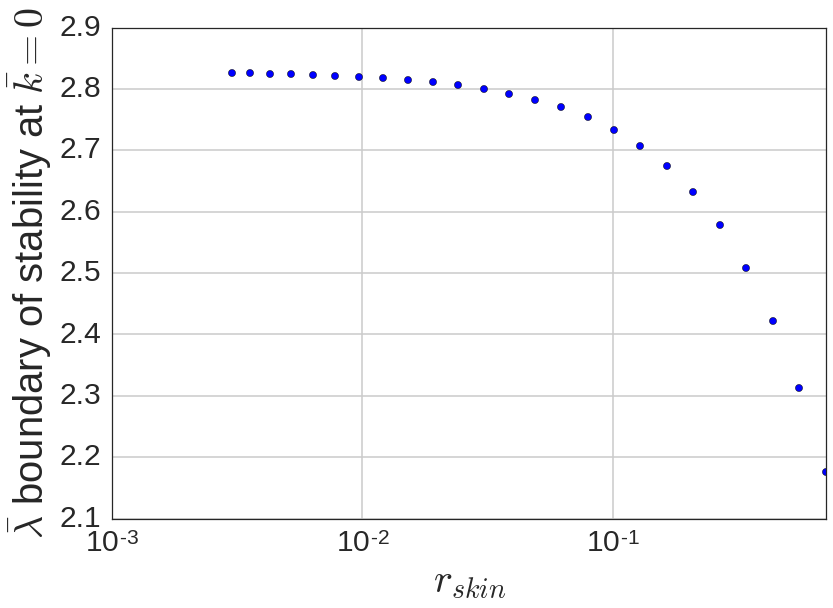

In [62]:
date_filenames = []
for date in dates:
    date_filenames.append("../../output/" + date + "/meshes.npz")    
lambda_boundary = []
for filename in date_filenames:
    results = np.load(filename)
    external_sausage_norm = results['d_w_norm_m_0']
    lambda_a_mesh = results['lambda_a_mesh']
    k_a_mesh = results['k_a_mesh']
    lambda_func = interp1d(lambda_a_mesh[0], external_sausage_norm[0], kind='cubic', bounds_error=False)
    lambda_boundary.append(brentq(lambda_func, 0.1, 3.0))  
plt.scatter(1-core_radii, lambda_boundary, s=50)
plt.xscale("log", nonposx='clip')
plt.grid('on')
plt.ylabel(r'$\bar{\lambda}$ boundary of stability at $\bar{k} = 0$', size=40)
plt.xlabel(r'$r_{skin}$', size=40)
plt.xlim(0.001, 0)
axes=plt.gca()
plt.setp(axes.get_xticklabels(), fontsize=30)
plt.setp(axes.get_yticklabels(), fontsize=30)
plt.show()

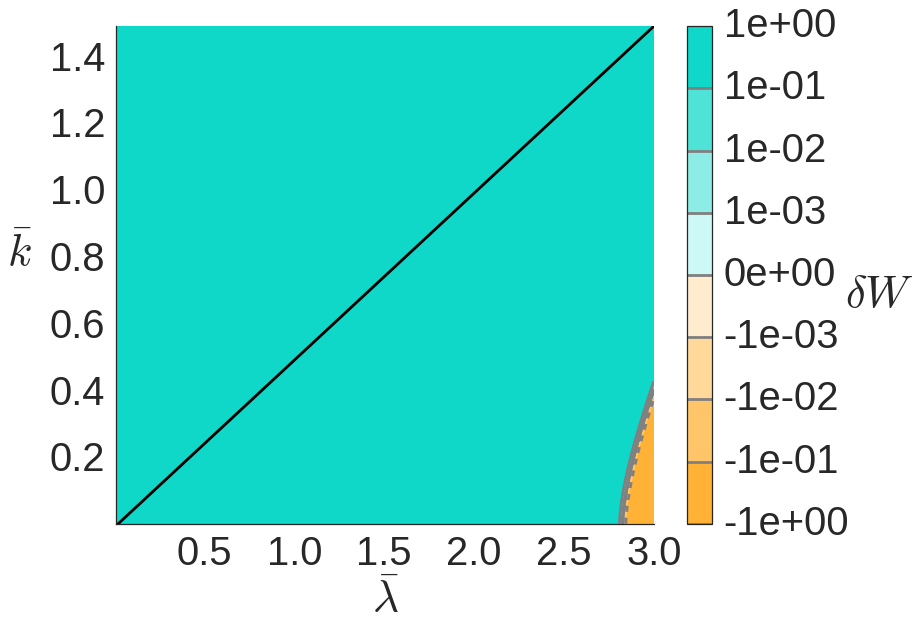

In [71]:
plot.plot_lambda_k_space_dw('../../output/2016-01-01-18-15/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=False,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (1.7, 1.0)],
                            interpolate=True)

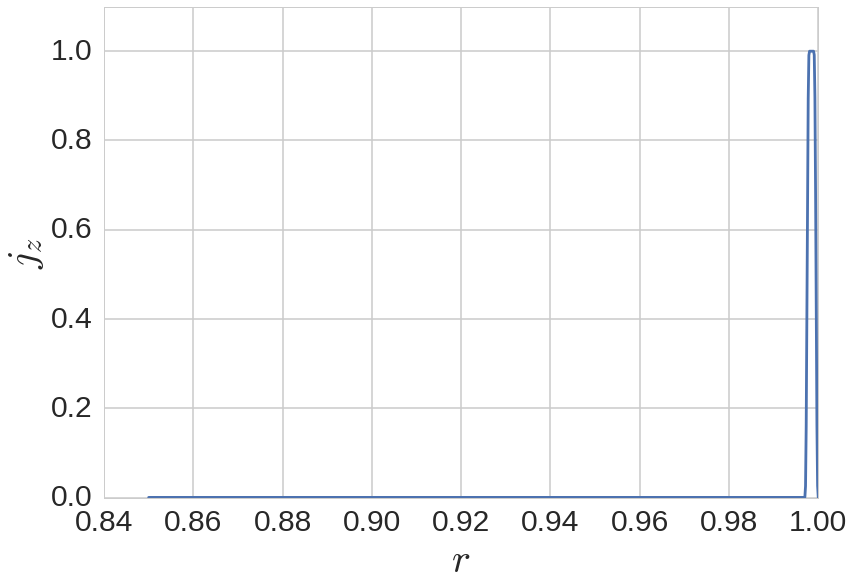

In [95]:
profile_kwargs = {'epsilon': 0.1,
                  'points_core': 250,
                  'points_skin': 250,
                  'points_transition': 250,
                  'core_radius_norm': 0.997,
                  'transition_width_norm': 0.001,
                  'skin_width_norm': 0.001}
profile = es.UnitlessSmoothedCoreSkin(k_bar=1,
                                      lambda_bar=1,
                                      **profile_kwargs)
r = np.linspace(0.85, 1, 1000)
j_z = splev(r, profile.get_tck_splines()['j_z'])
plt.plot(r, j_z / j_z.max())

plt.xlabel(r'$r$', fontsize=40)
plt.ylabel(r'$j_{z}$', fontsize=40)
plt.ylim(0, 1.1)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize=30)
plt.setp(ax.get_yticklabels(), fontsize=30)
plt.show()

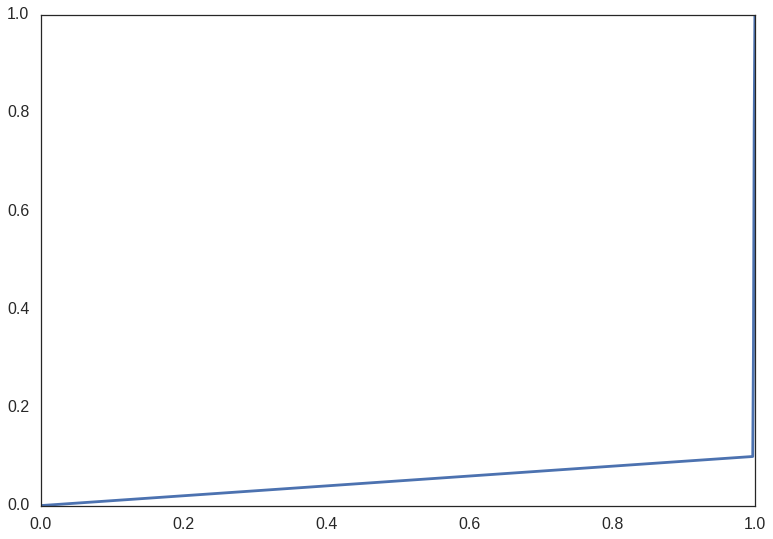

In [87]:
b_theta = splev(r, profile.get_tck_splines()['b_theta'])
plt.plot(r, b_theta / b_theta.max())


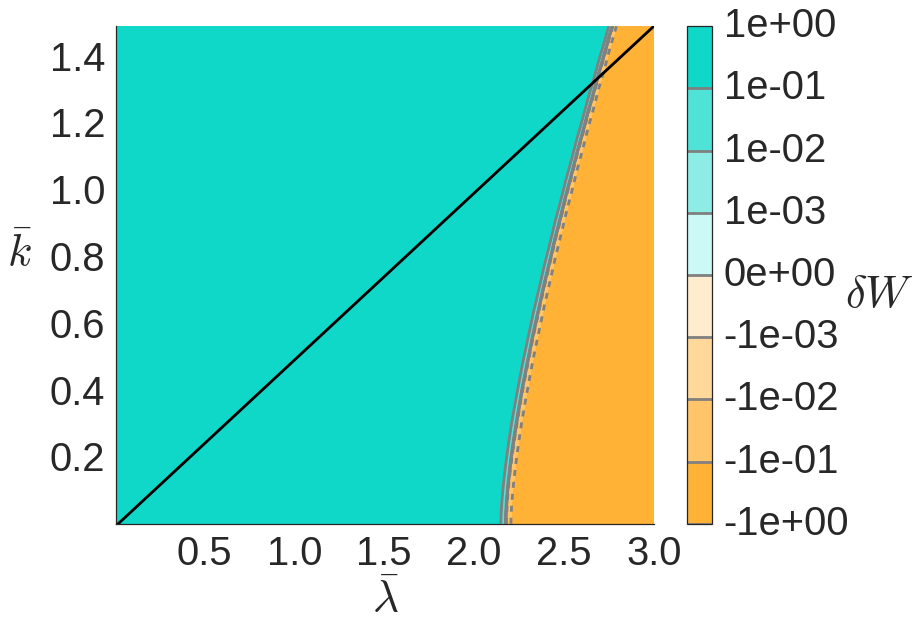

In [73]:
plot.plot_lambda_k_space_dw('../../output/2016-01-02-00-19/meshes.npz', 
                            1., 'ep12-m1', mode_to_plot='m_0', 
                            levels=[-1, -1e-1, -1e-2, -1e-3, 
                                    0, 1e-3, 1e-2, 1e-1, 1], 
                            floor_norm=True, analytic_compare=False,
                            label_pos=[(1.0, 1.), (1.5, 1.0), (1.7, 1.0)],
                            interpolate=True)

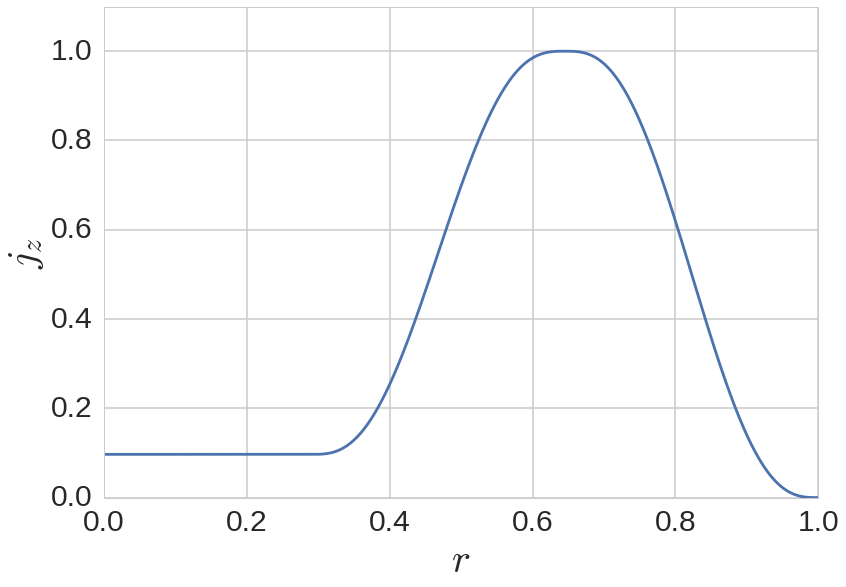

In [93]:
sns.set_style('whitegrid')
profile_kwargs = {'epsilon': 0.1,
                  'points_core': 250,
                  'points_skin': 250,
                  'points_transition': 250,
                  'core_radius_norm': 0.2910,
                  'transition_width_norm': 0.3539,
                  'skin_width_norm': 0.001}
profile = es.UnitlessSmoothedCoreSkin(k_bar=1,
                                      lambda_bar=1,
                                      **profile_kwargs)
r = np.linspace(0., 1, 1000)
j_z = splev(r, profile.get_tck_splines()['j_z'])
plt.plot(r, j_z / j_z.max())
plt.xlabel(r'$r$', fontsize=40)
plt.ylabel(r'$j_{z}$', fontsize=40)
plt.ylim(0, 1.1)
ax = plt.gca()
plt.setp(ax.get_xticklabels(), fontsize=30)
plt.setp(ax.get_yticklabels(), fontsize=30)
plt.show()

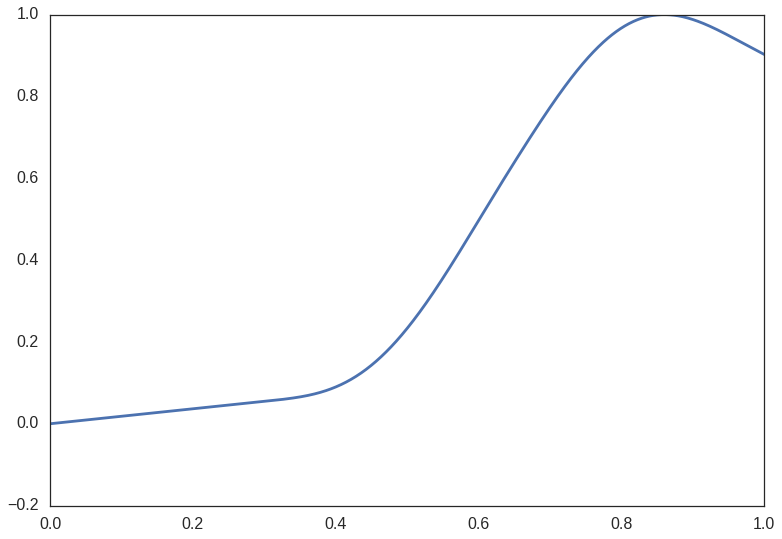

In [85]:
b_theta = splev(r, profile.get_tck_splines()['b_theta'])
plt.plot(r, b_theta / b_theta.max())
